# ID5059 2022-23: Coursework Assignment 1

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

## 1.organise the data

### 1.1read data

### Read the samll dataset (If you want to run a small data set, turn this cell into code)
flights = pd.read_csv("Combined_Flights_small.csv")

pd.set_option('display.max_columns', None)

In [2]:
# Read the medium dataset respectively ((If you want to run a medium data set, turn this cell into code))
flights_2018 = pd.read_csv("Combined_Flights_med_2018.csv")
flights_2019 = pd.read_csv("Combined_Flights_med_2019.csv")
flights_2020 = pd.read_csv("Combined_Flights_med_2020.csv")
flights_2021 = pd.read_csv("Combined_Flights_med_2021.csv")
flights_2022 = pd.read_csv("Combined_Flights_med_2022.csv")

# Combine them into a DataFrame
flights = pd.concat([flights_2018, flights_2019, flights_2020, flights_2021, flights_2022])

# Reset the index as the index of each original DataFrame may start from 0
flights.reset_index(drop=True, inplace=True)

In [3]:
flights.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,CRSElapsedTime,Distance,Year,...,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrDel15,ArrTimeBlk,DistanceGroup,Disruption
0,2018-07-13,United Air Lines Inc.,LAX,ORD,0,0,1845,231,1744,2018,...,IL,17,Illinois,41,1800-1859,36,0.0,0001-0559,7,0.0
1,2018-06-26,Mesa Airlines Inc.,CRP,IAH,0,0,1757,60,201,2018,...,TX,48,Texas,74,1700-1759,1857,0.0,1800-1859,1,0.0
2,2018-07-03,Southwest Airlines Co.,ECP,HOU,0,0,945,105,571,2018,...,TX,48,Texas,74,0900-0959,1130,0.0,1100-1159,3,0.0
3,2018-10-28,United Air Lines Inc.,LAS,IAH,0,0,1015,171,1222,2018,...,TX,48,Texas,74,1000-1059,1506,0.0,1500-1559,5,0.0
4,2018-11-01,ExpressJet Airlines Inc.,IAH,TUL,0,0,1856,90,429,2018,...,OK,40,Oklahoma,73,1800-1859,2026,0.0,2000-2059,2,0.0


In [4]:
#Check which attribute has null value
na_rows = flights.isna().sum(axis=0)
na_rows

FlightDate                                    0
Airline                                       0
Origin                                        0
Dest                                          0
Cancelled                                     0
Diverted                                      0
CRSDepTime                                    0
CRSElapsedTime                                0
Distance                                      0
Year                                          0
Quarter                                       0
Month                                         0
DayofMonth                                    0
DayOfWeek                                     0
Marketing_Airline_Network                     0
Operated_or_Branded_Code_Share_Partners       0
DOT_ID_Marketing_Airline                      0
IATA_Code_Marketing_Airline                   0
Flight_Number_Marketing_Airline               0
Operating_Airline                             0
DOT_ID_Operating_Airline                

There are missing values in "disruption" in medium dataset 

In [5]:
 # Drop rows with NaN values
flights = flights.dropna(subset=["Disruption"])

In [6]:
# View the distribution of the target variable
flights["Disruption"].value_counts()

0.0    233031
1.0     58894
Name: Disruption, dtype: int64

### 1.2 create test set 

In [7]:
# Select feature column
X = flights[['Year','Month','DayOfWeek', 'CRSDepTime','CRSArrTime', # features related to time
             'Distance', 'Dest','Origin', # features related to geographical location
             'Operating_Airline']] # features related to airlines

# Select target feature column
y = flights['Disruption']

In [8]:
# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Further divide 20% validation set from the training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5059, stratify=y_train)

In [10]:
# Check the allocated quantity
print("Number of training sets:", len(X_train), "Number of validation sets:", len(X_val), "Number of test sets:", len(X_test))
print("Number of training target:", len(y_train), "Number of validation target:", len(y_val), "Number of test target:", len(y_test))

Number of training sets: 186832 Number of validation sets: 46708 Number of test sets: 58385
Number of training target: 186832 Number of validation target: 46708 Number of test target: 58385


In [11]:
# "disruptiong" proportion in test set
y_test.value_counts() / len(y_test)

0.0    0.798253
1.0    0.201747
Name: Disruption, dtype: float64

In [12]:
# "disruptiong" Proportion in training set
y_train.value_counts() / len(y_train)

0.0    0.798257
1.0    0.201743
Name: Disruption, dtype: float64

#### Check size and type of data

In [13]:
X_train.head()

,Year,Month,DayOfWeek,CRSDepTime,CRSArrTime,Distance,Dest,Origin,Operating_Airline
175018,2020,3,3,1400,1655,632,AVP,ORD,ZW
171376,2020,8,2,1120,1315,651,PHX,SFO,UA
284812,2022,3,4,605,725,220,BWI,ISP,WN
5980,2018,4,1,800,1052,954,SEA,LAX,AS
93480,2019,3,2,1630,1831,646,ALB,CLT,AA


In [14]:
# check data information
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186832 entries, 175018 to 103422
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Year               186832 non-null  int64 
 1   Month              186832 non-null  int64 
 2   DayOfWeek          186832 non-null  int64 
 3   CRSDepTime         186832 non-null  int64 
 4   CRSArrTime         186832 non-null  int64 
 5   Distance           186832 non-null  int64 
 6   Dest               186832 non-null  object
 7   Origin             186832 non-null  object
 8   Operating_Airline  186832 non-null  object
dtypes: int64(6), object(3)
memory usage: 14.3+ MB


In [15]:
# check data information
X_train.describe()

,Year,Month,DayOfWeek,CRSDepTime,CRSArrTime,Distance
count,186832.000000,186832.000000,186832.000000,186832.000000,186832.000000,186832.000000
mean,2019.831367,6.323756,3.981438,1329.189025,1493.168997,779.416422
std,1.343585,3.449104,2.005879,482.537468,507.411955,580.511536
min,2018.000000,1.000000,1.000000,1.000000,1.000000,27.000000
25%,2019.000000,3.000000,2.000000,920.000000,1110.000000,355.000000
50%,2020.000000,6.000000,4.000000,1322.000000,1519.000000,628.000000
75%,2021.000000,9.000000,6.000000,1730.000000,1917.000000,1014.000000
max,2022.000000,12.000000,7.000000,2359.000000,2400.000000,5095.000000


In [16]:
# check the number of categories for each variable
X_train.nunique()

Year                    5
Month                  12
DayOfWeek               7
CRSDepTime           1291
CRSArrTime           1371
Distance             1645
Dest                  384
Origin                387
Operating_Airline      28
dtype: int64

## 2. data exploration

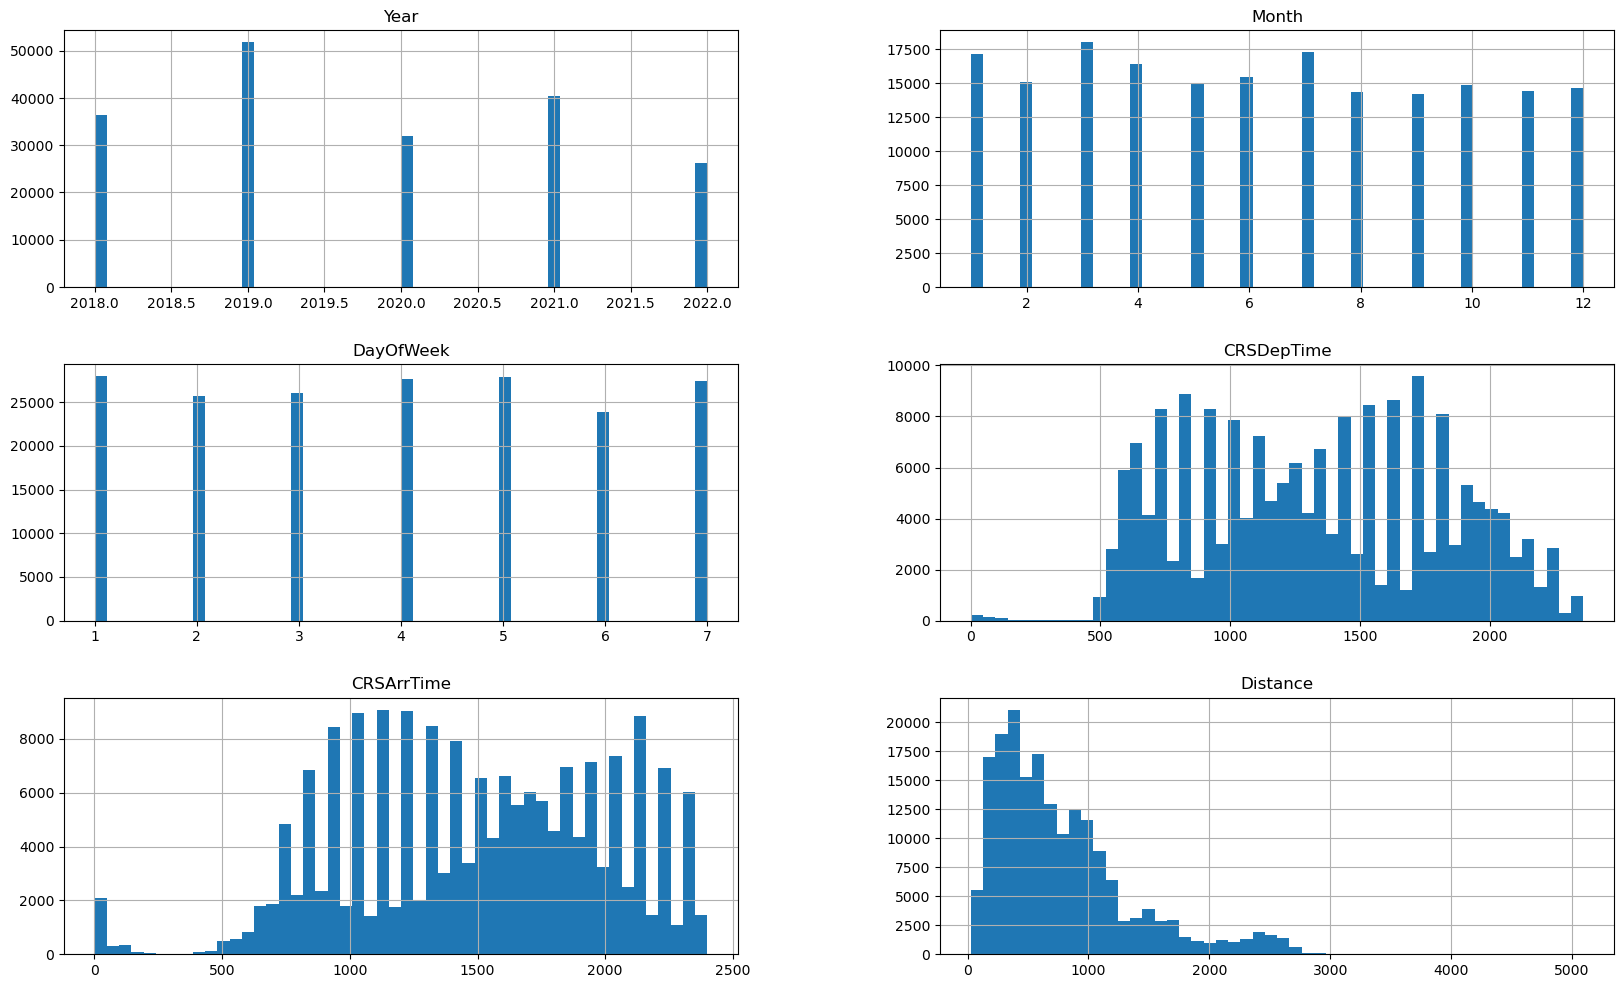

In [17]:
# Histogram to see data distribution of X_train 
X_train.hist(bins=50,figsize=(20,12))
plt.show()

* The number of flights is evenly distributed across months and weeks.
* Distribution varies in different years.
* Estimated departure and arrival time distributions have peaks.
* The distance distribution exhibits right-skewed distribution characteristics. There are more shorter-distance flights than longer-distance flights, with a clear peak. The number of flights decreases as distance increases, likely reflecting high demand for shorter-haul flights and limited supply of longer ranges.

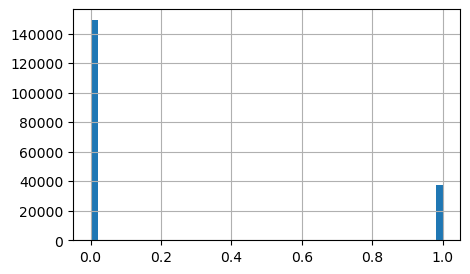

In [18]:
# Histogram to see the distribution of y_train(Disruption) data
y_train.hist(bins=50,figsize=(5,3))
plt.show()

#### check the number of scheduled and delayed flights under different conditions

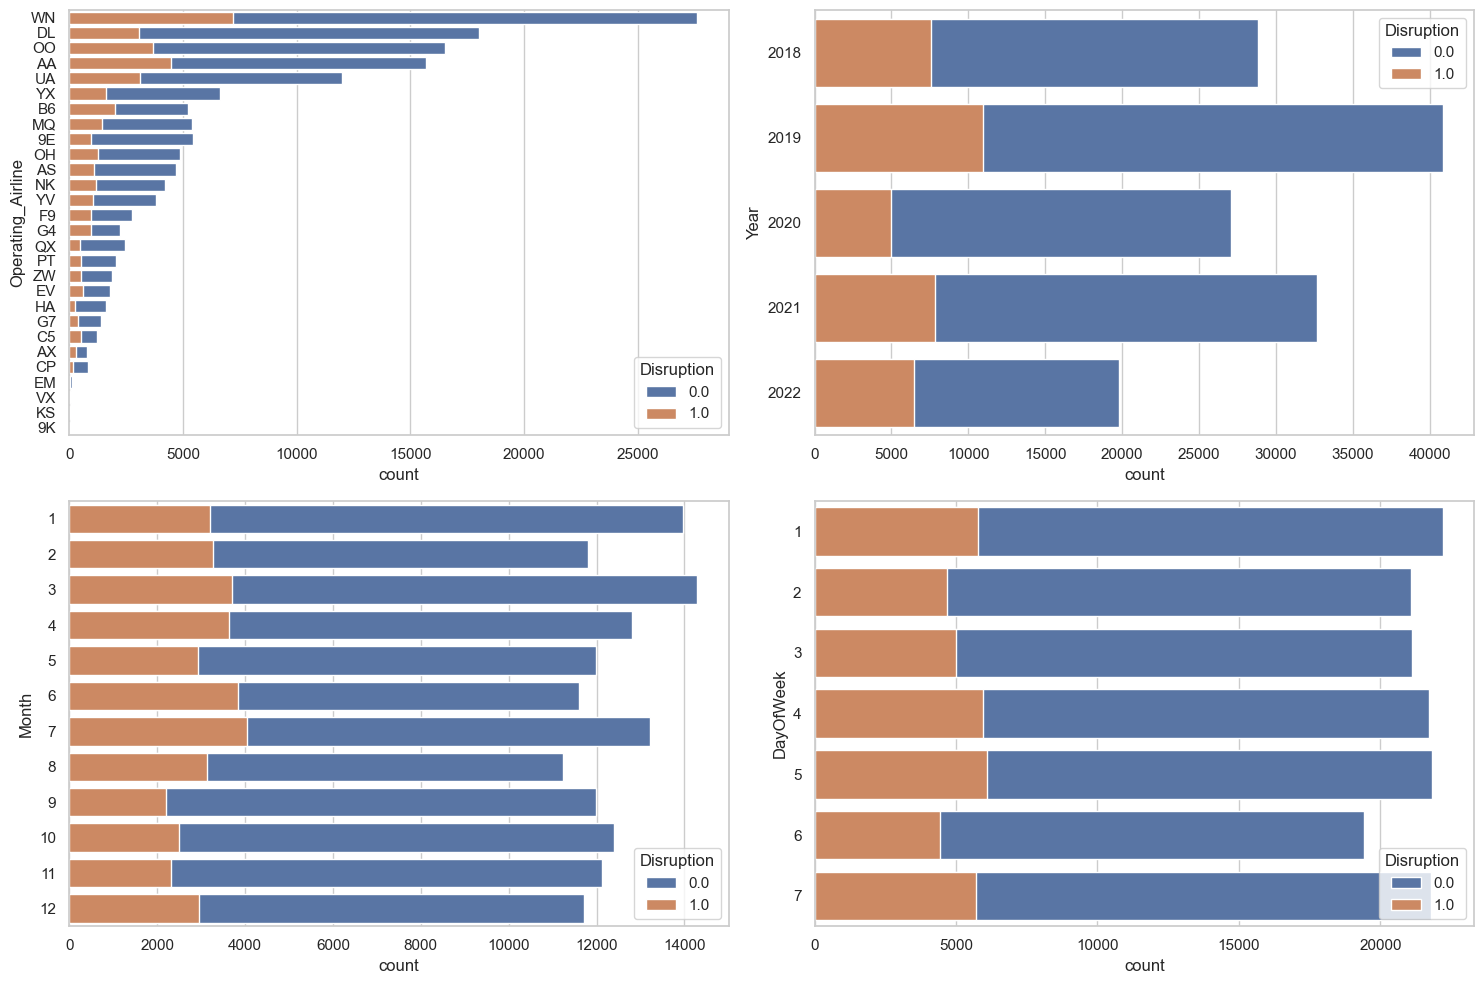

In [19]:
# Combine X and y of the train set for data exploration
train_combine = pd.concat([X_train, y_train], axis=1) 

# Set drawing style
sns.set(style="whitegrid")
fig,axs = plt.subplots(2,2,figsize=(15,10))

# Normal and delayed situations for different airlines 
airline_order = X_train['Operating_Airline'].value_counts().index # Sort by number of operating airlines
sns.countplot(data=train_combine, y='Operating_Airline', order=airline_order, hue='Disruption', dodge=False, ax=axs[0,0])
axs[0, 0].legend(loc='best', title='Disruption')  # Specify subplot for legend

# Normal and delayed situations in different year 
sns.countplot(data=train_combine, y='Year', hue='Disruption', dodge=False, ax=axs[0,1])
axs[0, 1].legend(loc='best', title='Disruption')  # Specify subplot for legend

# Normal and delayed situations in different months 
sns.countplot(data=train_combine, y='Month', hue='Disruption', dodge=False,ax=axs[1,0])
axs[1, 0].legend(loc='best', title='Disruption')  # Specify subplot for legend

# Normal and delayed situations on different weekdays 
sns.countplot(data=train_combine, y='DayOfWeek', hue='Disruption', dodge=False, ax=axs[1,1])
axs[1, 1].legend(loc='best', title='Disruption')

plt.tight_layout()
plt.show()

#### visualise the impact of COVID-19 during the data exploration

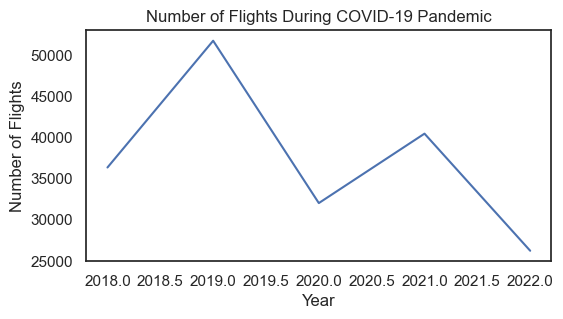

In [20]:
# Group by year and count the number of flights
flights_per_year = train_combine.groupby('Year').size()

# Plot the data
sns.set(style="white")
plt.figure(figsize=(6, 3))
flights_per_year.plot()
plt.title('Number of Flights During COVID-19 Pandemic')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.show()

* A significant reduction in flight numbers could be seen in 2020 and 2021

In [21]:
# Aggregate the data by year to calculate the total number of on-time and delayed flights for each year
# Assuming 'Disruption' column with 0 for on-time and 1 for delayed flights
year_flights = flights.groupby('Year')['Disruption'].value_counts().unstack(fill_value=0)
year_flights.columns = ['Ontime_flights', 'Disruption_flights']

# Calculate the percentages of on-time and delayed flights
year_flights['Total_flights'] = year_flights['Ontime_flights'] + year_flights['Disruption_flights']
year_flights['Ontime_per'] = year_flights['Ontime_flights'] / year_flights['Total_flights']
year_flights['Disruption_per'] = year_flights['Disruption_flights'] / year_flights['Total_flights']

# Reset index to make 'Year' a column again for plotting purposes
year_flights.reset_index(inplace=True)

year_flights

,Year,Ontime_flights,Disruption_flights,Total_flights,Ontime_per,Disruption_per
0,2018,45051,11834,56885,0.791966,0.208034
1,2019,63771,17145,80916,0.788114,0.211886
2,2020,42484,7739,50223,0.845907,0.154093
3,2021,50874,12244,63118,0.806014,0.193986
4,2022,30851,9932,40783,0.756467,0.243533


* Disruption rates in 2020 is the lowest

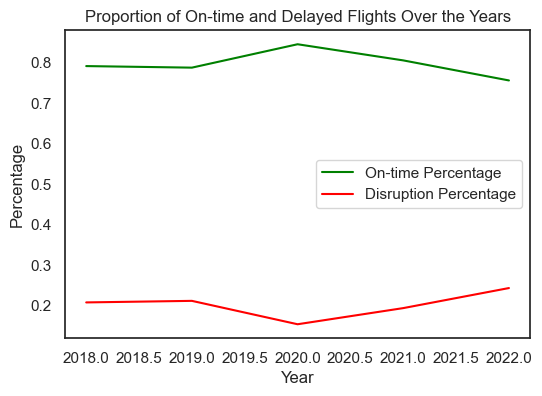

In [22]:
#  Create a line chart to show the proportion of on-time and delayed flights over the years
plt.figure(figsize=(6, 4))
sns.set(style="white")
plt.plot(year_flights['Year'], year_flights['Ontime_per'], label='On-time Percentage', color='green')
plt.plot(year_flights['Year'], year_flights['Disruption_per'], label='Disruption Percentage', color='red')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Proportion of On-time and Delayed Flights Over the Years')
plt.legend()
plt.show()

## 3.prepare the data

### 3.1 encode category feature

#### train set 

In [23]:
# select Category attributes
X_train_categorical = X_train[["Operating_Airline","Dest","Origin"]]

# define encoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
# fit and transform train set categorical feature
X_train_categorical_encoded = one_hot_encoder.fit_transform(X_train_categorical)
X_train_categorical_encoded

<186832x799 sparse matrix of type '<class 'numpy.float64'>'
	with 560496 stored elements in Compressed Sparse Row format>

In [24]:
# Convert to data frame
X_train_cat = X_train_categorical_encoded.toarray()
X_train_cat = pd.DataFrame(
  X_train_cat, 
  columns=one_hot_encoder.get_feature_names_out(),
  index=X_train_categorical.index)

####  validation set 

In [25]:
# validation set 

# Select category attributes
X_val_categorical = X_val[["Operating_Airline","Dest","Origin"]]

# use the encoder difined by train set to transform validation set 
X_val_categorical_encoded = one_hot_encoder.transform(X_val_categorical)
X_val_categorical_encoded

<46708x799 sparse matrix of type '<class 'numpy.float64'>'
	with 140123 stored elements in Compressed Sparse Row format>

In [26]:
# Convert to data frame
X_val_cat = X_val_categorical_encoded.toarray()
X_val_cat = pd.DataFrame(
  X_val_cat, 
  columns = one_hot_encoder.get_feature_names_out(),
  index= X_val_categorical.index)

### 3.2 Feature Engineering

In [27]:
# train set 
# Feature Engineering
# Change CRSDepTime and CRSArrTime to hours

X_train['CRSDepHour'] = X_train['CRSDepTime'] // 100
X_train['CRSArrHour'] = X_train['CRSArrTime'] // 100

# Delete CRSDepTime and CRSArrTime, hours CRSDepHour and CRSArrHour have been extracted
X_train.drop(['CRSDepTime', 'CRSArrTime'], axis=1, inplace=True)

X_train.head()

,Year,Month,DayOfWeek,Distance,Dest,Origin,Operating_Airline,CRSDepHour,CRSArrHour
175018,2020,3,3,632,AVP,ORD,ZW,14,16
171376,2020,8,2,651,PHX,SFO,UA,11,13
284812,2022,3,4,220,BWI,ISP,WN,6,7
5980,2018,4,1,954,SEA,LAX,AS,8,10
93480,2019,3,2,646,ALB,CLT,AA,16,18


In [28]:
# validation set 
# Feature Engineering
# Change CRSDepTime and CRSArrTime to hours

X_val['CRSDepHour'] = X_val['CRSDepTime'] // 100
X_val['CRSArrHour'] = X_val['CRSArrTime'] // 100

# Delete CRSDepTime and CRSArrTime, hours CRSDepHour and CRSArrHour have been extracted
X_val.drop(['CRSDepTime', 'CRSArrTime'], axis=1, inplace=True)

X_val.head()

,Year,Month,DayOfWeek,Distance,Dest,Origin,Operating_Airline,CRSDepHour,CRSArrHour
206560,2021,10,3,399,BOS,DCA,AA,20,21
99912,2019,9,3,177,ORD,IND,MQ,9,9
205166,2021,2,7,226,CLT,ATL,OH,13,15
96208,2019,4,3,227,DCA,RDU,OH,21,22
250393,2021,8,1,650,AUS,MCI,WN,15,17


#### Combine numerical and categorical 

In [29]:
# train set data
# Create object to store numeric column
X_train_num = X_train.drop(['Operating_Airline',"Dest","Origin"], axis=1)

# Combine numerical and categorical
X_train = pd.concat((X_train_num, X_train_cat), axis=1)
X_train.head()

,Year,Month,DayOfWeek,Distance,CRSDepHour,CRSArrHour,Operating_Airline_9E,Operating_Airline_9K,Operating_Airline_AA,Operating_Airline_AS,...,Origin_VEL,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_XWA,Origin_YAK,Origin_YKM,Origin_YUM
175018,2020,3,3,632,14,16,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171376,2020,8,2,651,11,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284812,2022,3,4,220,6,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5980,2018,4,1,954,8,10,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93480,2019,3,2,646,16,18,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# validation set data
# Create object to store numeric column
X_val_num = X_val.drop(['Operating_Airline',"Dest","Origin"], axis=1)

# Combine numerical and categorical
X_val = pd.concat((X_val_num, X_val_cat), axis=1)
X_val.head()

,Year,Month,DayOfWeek,Distance,CRSDepHour,CRSArrHour,Operating_Airline_9E,Operating_Airline_9K,Operating_Airline_AA,Operating_Airline_AS,...,Origin_VEL,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_XWA,Origin_YAK,Origin_YKM,Origin_YUM
206560,2021,10,3,399,20,21,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99912,2019,9,3,177,9,9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205166,2021,2,7,226,13,15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96208,2019,4,3,227,21,22,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250393,2021,8,1,650,15,17,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Train model

### 4.1 train DecisionTree classifier

In [31]:
# DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(random_state=5059)
tree_classifier.fit(X_train, y_train) # Train on the training set

# Get train predictions
y_train_predictions_tree = tree_classifier.predict(X_train)
# Get valid predictions
y_val_predictions_tree = tree_classifier.predict(X_val)

### 4.2 train Random Forest classifier

In [32]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(n_estimators=50, random_state=5059)
forest_classifier.fit(X_train, y_train)

# Get train predictions
y_train_predictions_Forest = forest_classifier.predict(X_train)
# Get valid predictions
y_val_predictions_Forest = forest_classifier.predict(X_val)

### 4.3 train logistic regression model

In [33]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
logistic_model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Fit the model to your training data
logistic_model.fit(X_train, y_train)

# Get train predictions
y_train_predictions_logistic = logistic_model.predict(X_train)
# Get valid predictions
y_val_predictions_logistic = logistic_model.predict(X_val)

##  5.Performance Measures

### 5.1 Accuracy Score

In [34]:
# accuracy_score
accuracy_score_tree = accuracy_score(y_val, y_val_predictions_tree)
accuracy_score_forest = accuracy_score(y_val, y_val_predictions_Forest)
accuracy_score_log = accuracy_score(y_val, y_val_predictions_logistic)

print(f"Accuracy Score for Decision Tree: {accuracy_score_tree}")
print(f"Accuracy Score for Random Forest: {accuracy_score_forest}")
print(f"Accuracy Score for Logistic Regression: {accuracy_score_log}")

Accuracy Score for Decision Tree: 0.7128115098056007
Accuracy Score for Random Forest: 0.7878735976706346
Accuracy Score for Logistic Regression: 0.584139761925152


### 5.2 precision, recall, f1 score
recall, the percentage of we correctly classify "1".

Precision, the percentage of things we classified as "1" that are actually "1".

The F1 score that balances the precision and recall.

In [35]:
# decison tree
# Calculate the precision of the logistic regression training set and validation set respectively
train_pr = precision_score(y_train,y_train_predictions_tree )
valid_pr = precision_score(y_val, y_val_predictions_tree)

# Calculate the Recall of the logistic regression training set and validation set respectively
train_recall = recall_score(y_train, y_train_predictions_tree)
valid_recall = recall_score(y_val, y_val_predictions_tree)

print("random forest Precision, train:", train_pr, "valid:", valid_pr)
print("random forest Recall, train:", train_recall, "valid:", valid_recall)

random forest Precision, train: 0.999946239449492 valid: 0.2707639287765652
random forest Recall, train: 0.9869468322190386 valid: 0.25013265414411545


In [36]:
# random forest
# Calculate the precision of the logistic regression training set and validation set respectively
train_pr = precision_score(y_train,y_train_predictions_Forest )
valid_pr = precision_score(y_val, y_val_predictions_Forest)

# Calculate the Recall of the logistic regression training set and validation set respectively
train_recall = recall_score(y_train, y_train_predictions_Forest)
valid_recall = recall_score(y_val, y_val_predictions_Forest)

print("random forest Precision, train:", train_pr, "valid:", valid_pr)
print("random forest Recall, train:", train_recall, "valid:", valid_recall)

random forest Precision, train: 0.9963839931429795 valid: 0.357100766057749
random forest Recall, train: 0.9869203013902155 valid: 0.06431072906717605


In [37]:
# logistic regression
# Calculate the precision of the training set and validation set respectively
train_pr = precision_score(y_train, y_train_predictions_logistic)
valid_pr = precision_score(y_val, y_val_predictions_logistic)

# Calculate the Recall of training set and validation set respectively
train_recall = recall_score(y_train, y_train_predictions_logistic)
valid_recall = recall_score(y_val, y_val_predictions_logistic)

print("logistic_model Precision, train:", train_pr, "valid:", valid_pr)
print("logistic_model Recall, train:", train_recall, "valid:", valid_recall)

logistic_model Precision, train: 0.2631504021638551 valid: 0.26245784048263743
logistic_model Recall, train: 0.5885068449538363 valid: 0.5863313169903428


### 5.3 cross validation

In [38]:
# DecisionTree
scores_DecisionTree = cross_val_score(tree_classifier, X_train, y_train,cv=3, scoring="accuracy")# splitting the training set into K folds
print(scores_DecisionTree)

[0.71119818 0.71104902 0.70733979]


In [39]:
# RandomForest
scores_RandomForest = cross_val_score(forest_classifier, X_train, y_train, cv=3, scoring="accuracy") # splitting the training set into K folds
print(scores_RandomForest)

[0.78982947 0.78905535 0.78981004]


In [40]:
# logistic
scores_logistic = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring="accuracy") # splitting the training set into K folds
print(scores_logistic)

[0.57414296 0.5755078  0.58836911 0.56998341 0.57402451]


### 5.4 Confusion Matrix 

##### DecisionTree Confusion Matrix

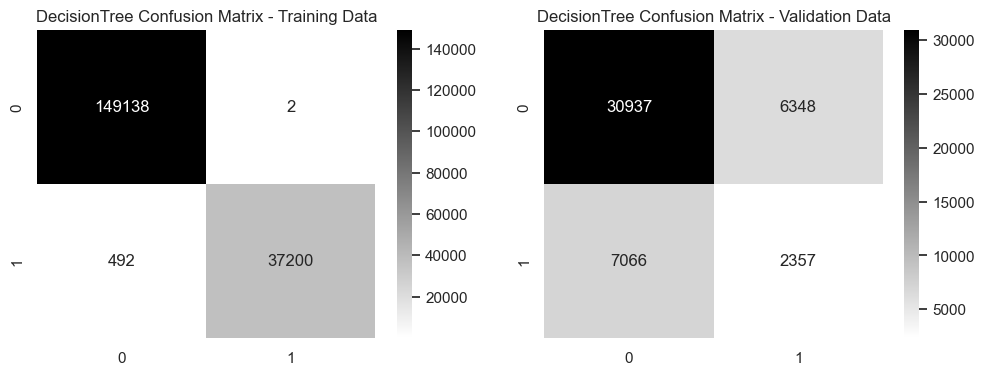

In [41]:
# Calculate the confusion matrix generated by the prediction results of the SGD classifier on the training data
matrix_train_tree = confusion_matrix(y_train, y_train_predictions_tree)


# Calculate the confusion matrix generated by the prediction results of the SGD classifier on the valid data
matrix_val_tree = confusion_matrix(y_val, y_val_predictions_tree)

# Visualizing the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for training data
sns.heatmap(matrix_train_tree, annot=True, fmt='d', cmap='binary', annot_kws={"fontsize": 12}, ax=axes[0])
axes[0].set_title('DecisionTree Confusion Matrix - Training Data')

# Plot for validation data
sns.heatmap(matrix_val_tree, annot=True, fmt='d', cmap='binary', annot_kws={"fontsize": 12}, ax=axes[1])
axes[1].set_title('DecisionTree Confusion Matrix - Validation Data')

plt.show()

##### Random Forest Confusion Matrix

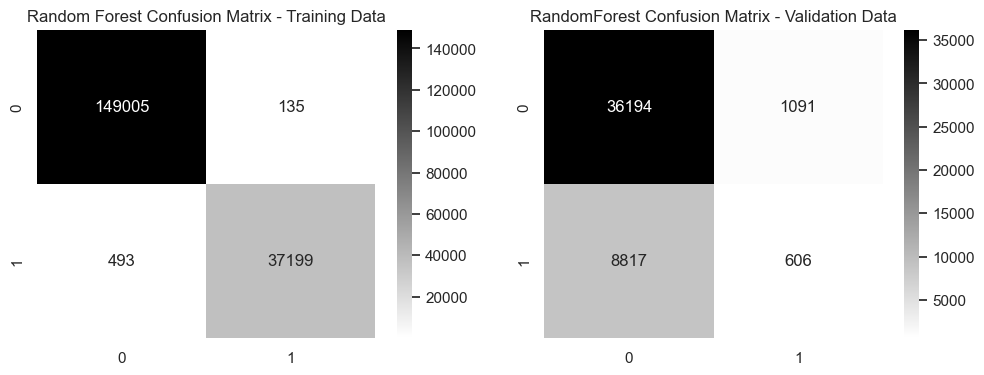

In [42]:
# Calculate the confusion matrix generated by the prediction results of the SGD classifier on the training data
matrix_train_forest = confusion_matrix(y_train, y_train_predictions_Forest)


# Calculate the confusion matrix generated by the prediction results of the SGD classifier on the valid data
matrix_val_forest = confusion_matrix(y_val, y_val_predictions_Forest)

# Visualizing the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for training data
sns.heatmap(matrix_train_forest, annot=True, fmt='d', cmap='binary', annot_kws={"fontsize": 12}, ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix - Training Data')

# Plot for validation data
sns.heatmap(matrix_val_forest, annot=True, fmt='d', cmap='binary', annot_kws={"fontsize": 12}, ax=axes[1])
axes[1].set_title('RandomForest Confusion Matrix - Validation Data')

plt.show()

##### logistic regression confusion matrix 

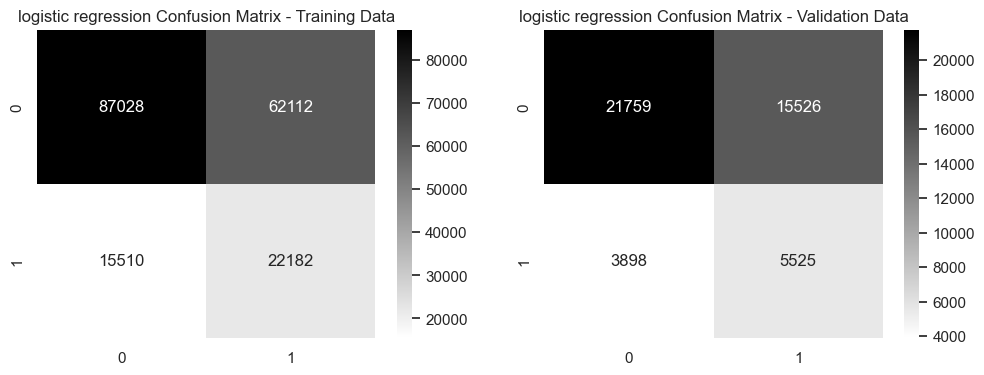

In [43]:

# Calculate the confusion matrix generated by the prediction results of the SGD classifier on the training data
matrix_train = confusion_matrix(y_train, y_train_predictions_logistic)

# Calculate the confusion matrix generated by the prediction results of the SGD classifier on the valid data
matrix_val = confusion_matrix(y_val, y_val_predictions_logistic)

# Visualizing the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for training data
sns.heatmap(matrix_train, annot=True, fmt='d', cmap='binary', annot_kws={"fontsize": 12}, ax=axes[0])
axes[0].set_title('logistic regression Confusion Matrix - Training Data')

# Plot for validation data
sns.heatmap(matrix_val, annot=True, fmt='d', cmap='binary', annot_kws={"fontsize": 12}, ax=axes[1])
axes[1].set_title('logistic regression Confusion Matrix - Validation Data')

plt.show()

### 5.5 ROC CURVES

In [44]:
# Three important components of ROC curve are calculated: 
# false positive rate (FPR, False Positive Rate), true rate (TPR, True Positive Rate) and thresholds (thresholds)

# Get predicted probabilities for the positive class
tree_predictions = tree_classifier.predict_proba(X_val)[:,1]
# Compute ROC curve 
FPR_tree, TPR_tree, thresholds_tree = roc_curve(y_val, tree_predictions)

In [45]:
# Get predicted probabilities for the positive class
forest_predictions = forest_classifier.predict_proba(X_val)[:,1]
# Compute ROC curve 
FPR_forest, TPR_forest, thresholds_forest = roc_curve(y_val, forest_predictions)

In [46]:
# Get predicted probabilities for the positive class
logistic_prediction = logistic_model.predict_proba(X_val)[:, 1]

# Compute ROC curve 
FPR_logistics, TPR_logistics, thresholds = roc_curve(y_val, logistic_prediction)

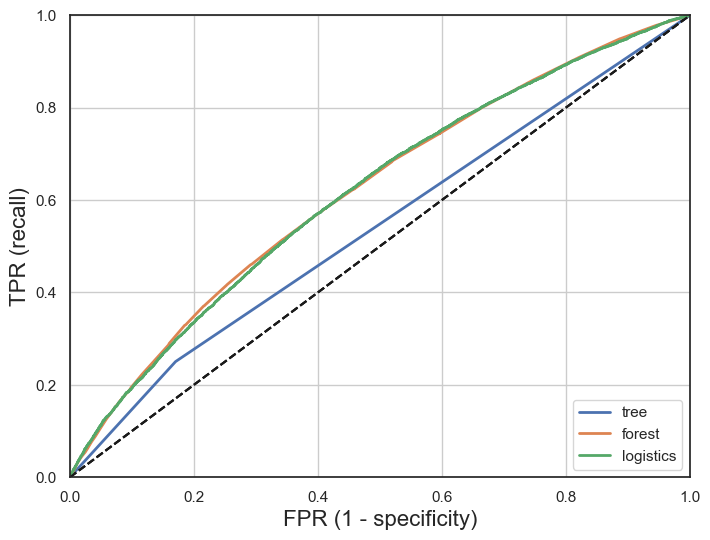

In [47]:

def plot_roc_curve(fpr, tpr, label=None):
             plt.plot(fpr, tpr, linewidth=2, label=label)
             plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
             plt.axis([0, 1, 0, 1])
             plt.xlabel('FPR (1 - specificity)', fontsize=16)
             plt.ylabel('TPR (recall)', fontsize=16)
             plt.grid(True)
            
# the Random Forest classifier is superior to the DecisionTreeClassifier AND SGD classifier because its ROC curve is much closer to the top-left corner, and it has a greater AUC
plt.figure(figsize=(8, 6))
plot_roc_curve(FPR_tree, TPR_tree, 'tree')
plot_roc_curve(FPR_forest, TPR_forest, 'forest')
plot_roc_curve(FPR_logistics, TPR_logistics, 'logistics')
plt.legend(loc="lower right")
plt.show()

##### AUC

In [48]:
# Decision tree AUC Value
# The probabilities predicted by the model are tree_predictions
auc_value_tree = roc_auc_score(y_val, tree_predictions)
print(f"Decision tree AUC Value: {auc_value_tree}")

Decision tree AUC Value: 0.5399387888914662


In [49]:
# Random forest AUC Value
# The probabilities predicted by the model are tree_predictions
auc_value_forest = roc_auc_score(y_val, forest_predictions)
print(f"Random forest AUC Value: {auc_value_forest}")

Random forest AUC Value: 0.618741067236798


In [50]:
# logistics regression AUC Value
# The probabilities predicted by the model are tree_predictions
auc_value_logistic = roc_auc_score(y_val, logistic_prediction)
print(f"logistic regression AUC Value: {auc_value_logistic}")

logistic regression AUC Value: 0.6166569573154721


In [51]:
# Print each row of the table
print(f"Decision Tree: {auc_value_tree:.4f}")
print(f"Random Forest: {auc_value_forest:.4f}")
print(f"logistic regression: {auc_value_logistic:.4f}")

Decision Tree: 0.5399
Random Forest: 0.6187
logistic regression: 0.6167


The AUC (Area Under the Curve) value is the area under the ROC curve, providing a single value that quantifies model performance. The AUC of the Randomforest classifier is the highest among others.

## 5 Fine tune model

In [52]:
# performing a grid search for hyperparameter tuning 

# define a grid of hyperparameter combinations
parameter_grid = [
    # Try 12 (3×4) combinations of hyperparameters:
    {'n_estimators': [10,30,50], # The number of trees in the forest.
     'max_features': [4, 6, 8]} # The number of features to consider when looking for the best split
]

# You create an instance of the RandomForestClassifier with a specified random state
forest_classifier = RandomForestClassifier(random_state=5059)

# create an instance of GridSearchCV to perform the grid search
# Train across 5 folds, giving a total of (3*4)*5=60 rounds of training
forest_grid_search = GridSearchCV(
    forest_classifier, 
    parameter_grid, 
    cv=5,
    scoring='accuracy',
    return_train_score=True)

#  training data, grid search explore all combinations of hyperparameters,it will find the best combination
forest_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5059),
             param_grid=[{'max_features': [4, 6, 8],
                          'n_estimators': [10, 30, 50]}],
             return_train_score=True, scoring='accuracy')

In [53]:
print(forest_grid_search.best_estimator_)

RandomForestClassifier(max_features=8, n_estimators=50, random_state=5059)


In [54]:
# Final model uses best parameters from grid search
final_model = forest_grid_search.best_estimator_

## 6. Run final model on test set

In [55]:
# Encoding test set category attributes

# Select category attributes
X_test_categorical = X_test[["Operating_Airline","Dest","Origin"]]

# transform test set
X_test_categorical_encoded = one_hot_encoder.transform(X_test_categorical)
X_test_categorical_encoded

# Convert to data frame
X_test_cat = X_test_categorical_encoded.toarray()
X_test_cat = pd.DataFrame(
  X_test_cat, 
  columns=one_hot_encoder.get_feature_names_out(),
  index=X_test_categorical.index)

In [56]:
# Feature Engineering
# Change CRSDepTime and CRSArrTime to hours

X_test['CRSDepHour'] = X_test['CRSDepTime'] // 100
X_test['CRSArrHour'] = X_test['CRSArrTime'] // 100

# Delete CRSDepTime and CRSArrTime, hours CRSDepHour and CRSArrHour have been extracted
X_test.drop(['CRSDepTime', 'CRSArrTime'], axis=1, inplace=True)

In [57]:
# numeric column
X_test_num = X_test.drop(['Operating_Airline',"Dest","Origin"], axis=1)

# Combine numerical and categorical
X_test = pd.concat((X_test_num, X_test_cat), axis=1)
X_test.head()

,Year,Month,DayOfWeek,Distance,CRSDepHour,CRSArrHour,Operating_Airline_9E,Operating_Airline_9K,Operating_Airline_AA,Operating_Airline_AS,...,Origin_VEL,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_XWA,Origin_YAK,Origin_YKM,Origin_YUM
119071,2019,3,4,383,14,15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
282556,2022,2,4,224,7,8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285203,2022,5,4,399,12,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29808,2018,4,5,534,5,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8032,2018,4,5,446,13,15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# use the best model to predict the test set features
y_test_pred = final_model.predict(X_test)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Printing accuracy
print(f"Test set accuracy: {test_accuracy}")

# Detailed performance reporting (including precision, recall, F1 score, etc.)
print(classification_report(y_test, y_test_pred))

Test set accuracy: 0.7836259313179755
              precision    recall  f1-score   support

         0.0       0.80      0.96      0.88     46606
         1.0       0.33      0.07      0.12     11779

    accuracy                           0.78     58385
   macro avg       0.57      0.52      0.50     58385
weighted avg       0.71      0.78      0.72     58385



* For the small dataset, the overall accuracy of the model on the test set is approximately 79.43%. 
* For the medium dataset, the overall accuracy of the model on the test set is approximately 78.36%. 
* The model shows relatively good precision and recall for class 0, indicating that it performs well in identifying instances of class 0. However, the model has lower precision and recall for class 1, suggesting challenges in correctly identifying instances of class 1.